<a href="https://colab.research.google.com/github/MarynaLongnickel/IsFood/blob/master/IsFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <b><font size="10">Is it eat?</font></b><br>
  <font size="3">Food Detection App</font><br><br>
  <img src="https://i.imgur.com/BjTLsem.jpg" width="50%" height="50%"><br>
  <a href="https://github.com/MarynaLongnickel/IsFood">GitHub</a> 
  <br><br>
</p>

## Dependencies

In [12]:
!pip install imageio

import cv2
import imageio
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from keras.models import load_model

## Functions

In [0]:
# upload Keras model or input model url
def get_model(url = None):
  if not url:
    file = files.upload()
    model = load_model(list(file.keys())[0])
  else:
    !wget -nc $url -O model.h5 
    model = load_model('model.h5')
  return model


# Upload image to be tested or input image url
def get_img(url = None):
  if not url:
    file = files.upload()
    img = cv2.imread(list(file.keys())[0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  else:
    img = imageio.imread(url)
  return img


# Prediction
def predict(image = None):
  if not image:
    I = get_img()
  else:
    I = get_img(url = image)

  # Get shape of model inputs
  shape = model.get_config()[0]['config']['batch_input_shape']
  shape = ((0,-1) + shape[1:])[1:]

  small_img = cv2.resize(I, (shape[1], shape[2]), interpolation=cv2.INTER_CUBIC)
  small_img = small_img.reshape(shape)

  prediction = model.predict_classes(small_img, batch_size=32, verbose=0)

  plt.imshow(I)
  plt.grid(False)
  plt.axis('off')
  plt.title('Foodz!' if prediction == 1 else 'Not a foodz :<', fontsize = 30)

# Prediction

Below are some sample predictions. To test your own image, enter `predict()` to upload or `predict(<url>)` to test an image on the web.

File ‘model.h5’ already there; not retrieving.


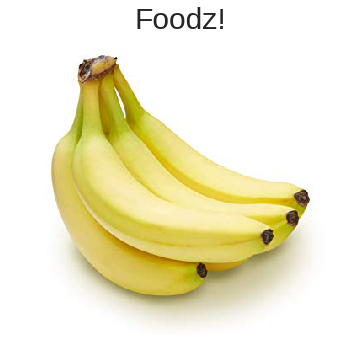

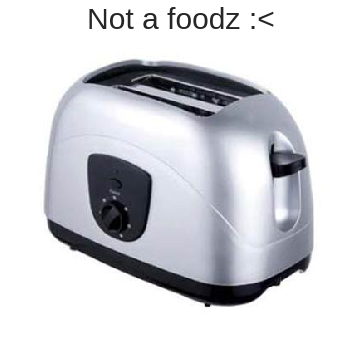

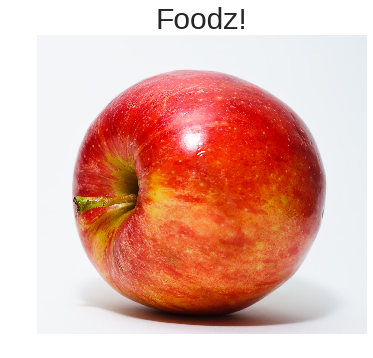

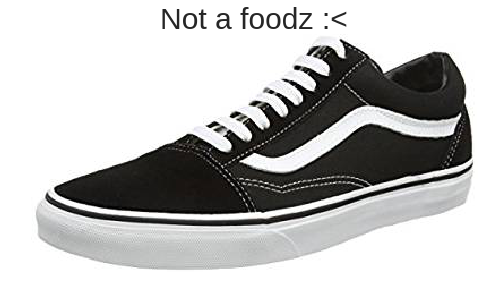

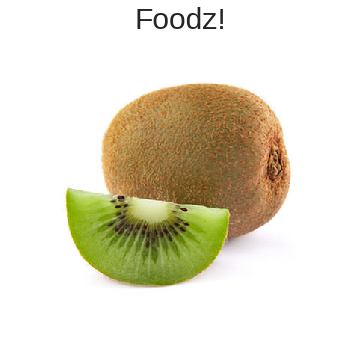

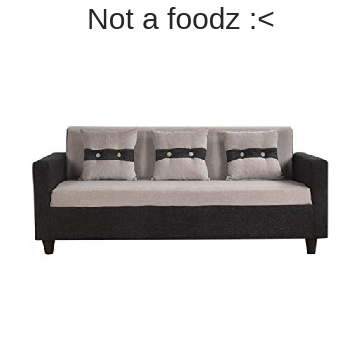

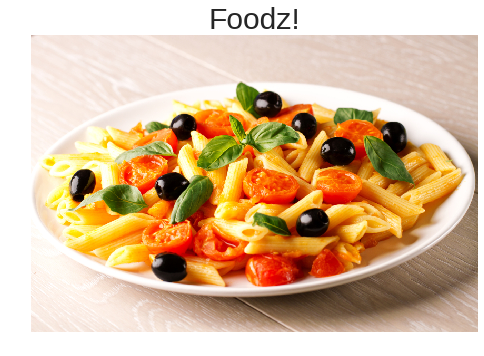

In [15]:
# Sample images
banana = 'https://images-na.ssl-images-amazon.com/images/I/71gI-IUNUkL._SY355_.jpg'
toaster = 'http://www.images2.wikia.nocookie.net/__cb20080129134804/swfanon/images/8/8f/Toaster.jpg'
apple = 'https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg'
shoe = 'https://images-na.ssl-images-amazon.com/images/I/415KP18CK5L._SX395_QL70_.jpg'
kiwi = 'https://www.comenaranjas.com/images/stories/virtuemart/product/kiwi-jumbo.jpg'
sofa = 'https://images-na.ssl-images-amazon.com/images/I/61O8b-Vrk-L._SX425_.jpg'
pasta = 'https://res.cloudinary.com/demo/image/upload/pasta.jpg'

samples = [banana, toaster, apple, shoe, kiwi, sofa, pasta]


# Initialize model
model = get_model(url = 'https://github.com/MarynaLongnickel/IsFood/blob/master/model500.h5?raw=true');

# Predict
for s in samples:
  predict(s)
  plt.show()

## Model as was created in PyCharm

In [0]:
import cv2
import sklearn
import numpy as np
from random import shuffle
from sklearn import model_selection
from keras.utils import to_categorical
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D

# dimensions of images the model will work with
W, H = 50, 50

# Data matrix is initialized
X = [[] for _ in range(269)]
# target values array
y = np.concatenate((np.ones(144), np.zeros(125)))

# Prepare downloaded images and fill in the data matrix
for i in range(144):
    img = 'Images\\food_' + str(i + 1) + '.jpg'
    small_img = cv2.resize(cv2.imread(img), (W, H), interpolation=cv2.INTER_CUBIC)
    # color is normalized
    small_img = cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB)
    X[i] = small_img

for i in range(125):
    img = 'Images\\notfood_' + str(i + 1) + '.jpg'
    small_img = cv2.resize(cv2.imread(img), (W, H), interpolation=cv2.INTER_CUBIC)
    small_img = cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB)
    X[i + 144] = small_img

# Shuffle data so train and test sets have the same class distribution
ind = list(range(269))
shuffle(ind)
X = np.array(X)[ind]
y = y[ind]

num_classes = 2
y = to_categorical(y, num_classes)

batch = 5
epochs = 500
channels = 3

# Constructing the model
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(H, W, channels)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.1))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# Defining train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Generate batches of augmented data
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=False)
datagen.fit(X_train)

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32,
                    epochs=epochs,
                    verbose=1,
                    validation_data=[X_val, y_val]
                    )

# Make predictions on the test set
predictions = []
actual = [0 if y_test[i][0] == 1 else 1 for i in range(len(y_test))]

for img in X_test:
    img.reshape((-1, 50, 50, 3)
    p = model.predict_classes(img), batch_size=32, verbose=0)[0]
    predictions.append(p)

print('sum: ', sum([1 if predictions[i] == actual[i] else 0 for i in range(len(actual))]) / len(actual))

# Plot validation set loss and accuracy history
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.suptitle('Validation set history', fontsize=25)
ax.plot(history.history['val_loss'], 'r')
ax.set_ylabel('LOSS', color='r', fontsize=20)
ax2.plot(history.history['val_acc'], 'g')
ax2.set_ylabel('ACCURACY', color='g', fontsize=20)
plt.show()

## Results

After 150 epochs, the model reached accuracy of ~92%.<br>
<img src="https://i.imgur.com/GY55huR.png" width="60%" height="60%">